#  Analyzing Amazon Sales Data.

In [5]:
#loading the required libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# importing the dataset
data= pd.read_csv('D:/Data Analysis Projects/Amazon Sales data.csv')
data= pd.DataFrame(data= data)
data 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
data.shape

(100, 14)

In [9]:
data.size

1400

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [11]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [18]:
data.describe(include="")

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,100,100,100,100,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
unique,7,76,12,2,4,100,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,NaN,11/17/2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,4,13,50,30,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.550204e+08,NaN,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,1.146066e+08,NaN,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.389225e+08,NaN,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.577086e+08,NaN,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.907551e+08,NaN,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05


In [19]:
data.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [20]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [25]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', dayfirst=False)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce', dayfirst=False)

In [26]:
data = data.astype({'Ship Date': 'datetime64[ns]','Order Date':'datetime64[ns]'})

In [27]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [31]:
data.isnull().sum()

Region             0
Country            0
Item Type          0
Sales Channel      0
Order Priority     0
Order Date        34
Order ID           0
Ship Date         36
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         1
Total Profit       0
dtype: int64

In [32]:
# Fill missing values for numerical columns with their mean
data['Total Cost'].fillna(data['Total Cost'].mean(), inplace=True)
data['Order Date'].fillna(data['Order Date'].median(), inplace=True)
data['Ship Date'].fillna(data['Ship Date'].median(), inplace=True)



In [33]:
# Check if all missing values are handled
print(data.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


<Axes: >

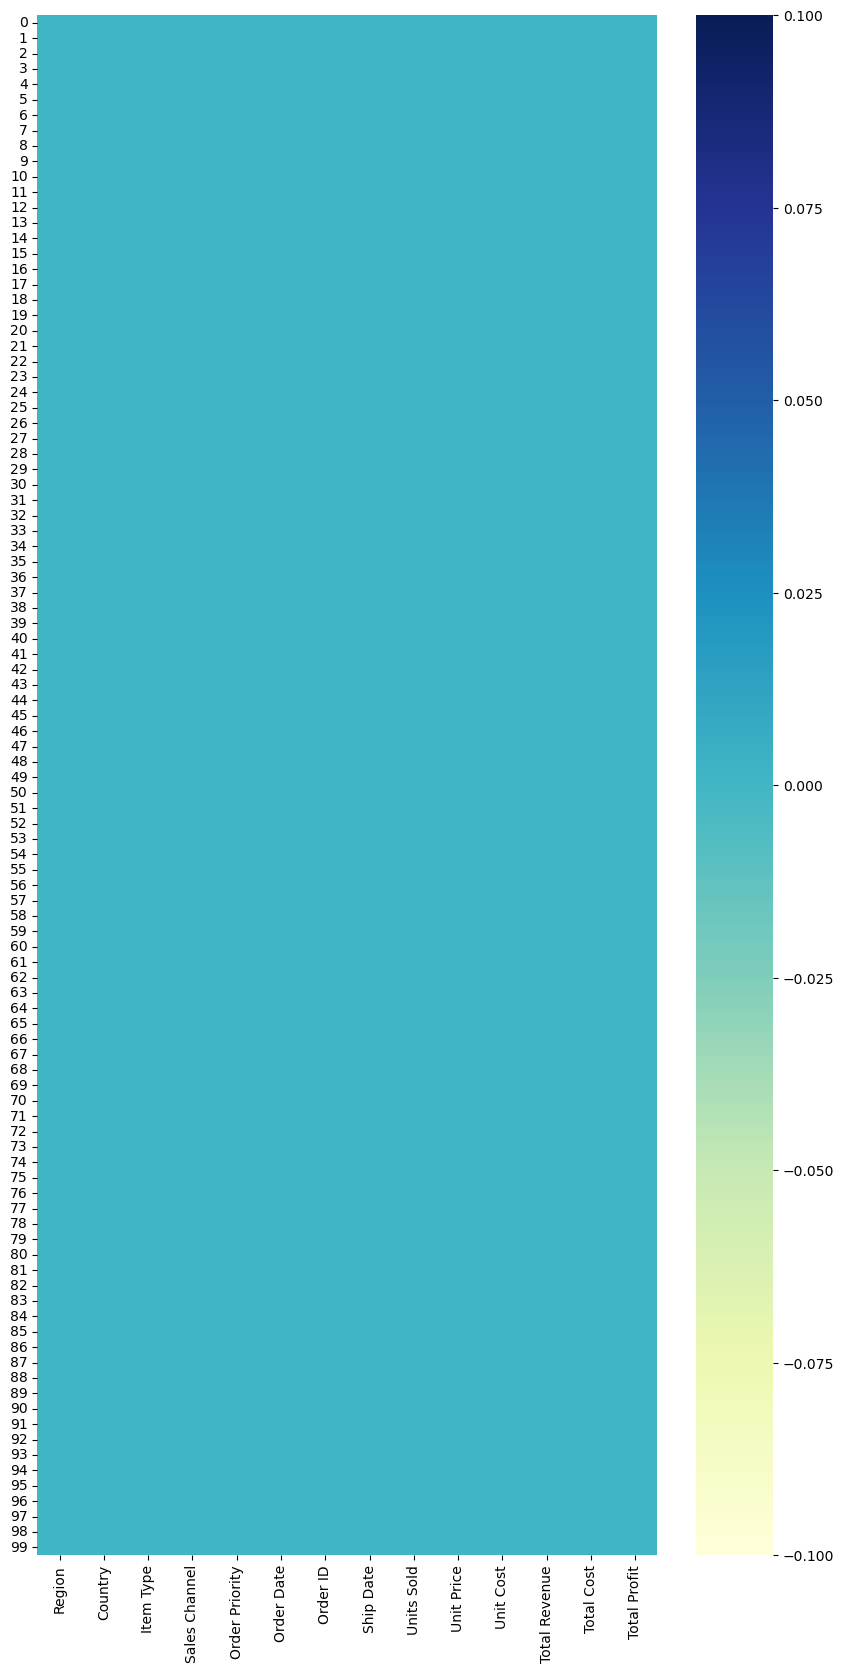

In [34]:
# NO ANY NULL VALUE PRESENT IN OUR DATASET.
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(), cmap="YlGnBu")

In [35]:
test = data.iloc[0, 12] = np.nan   # ADDING NULL VALUE JUST FOR DEMO
test

nan

<Axes: >

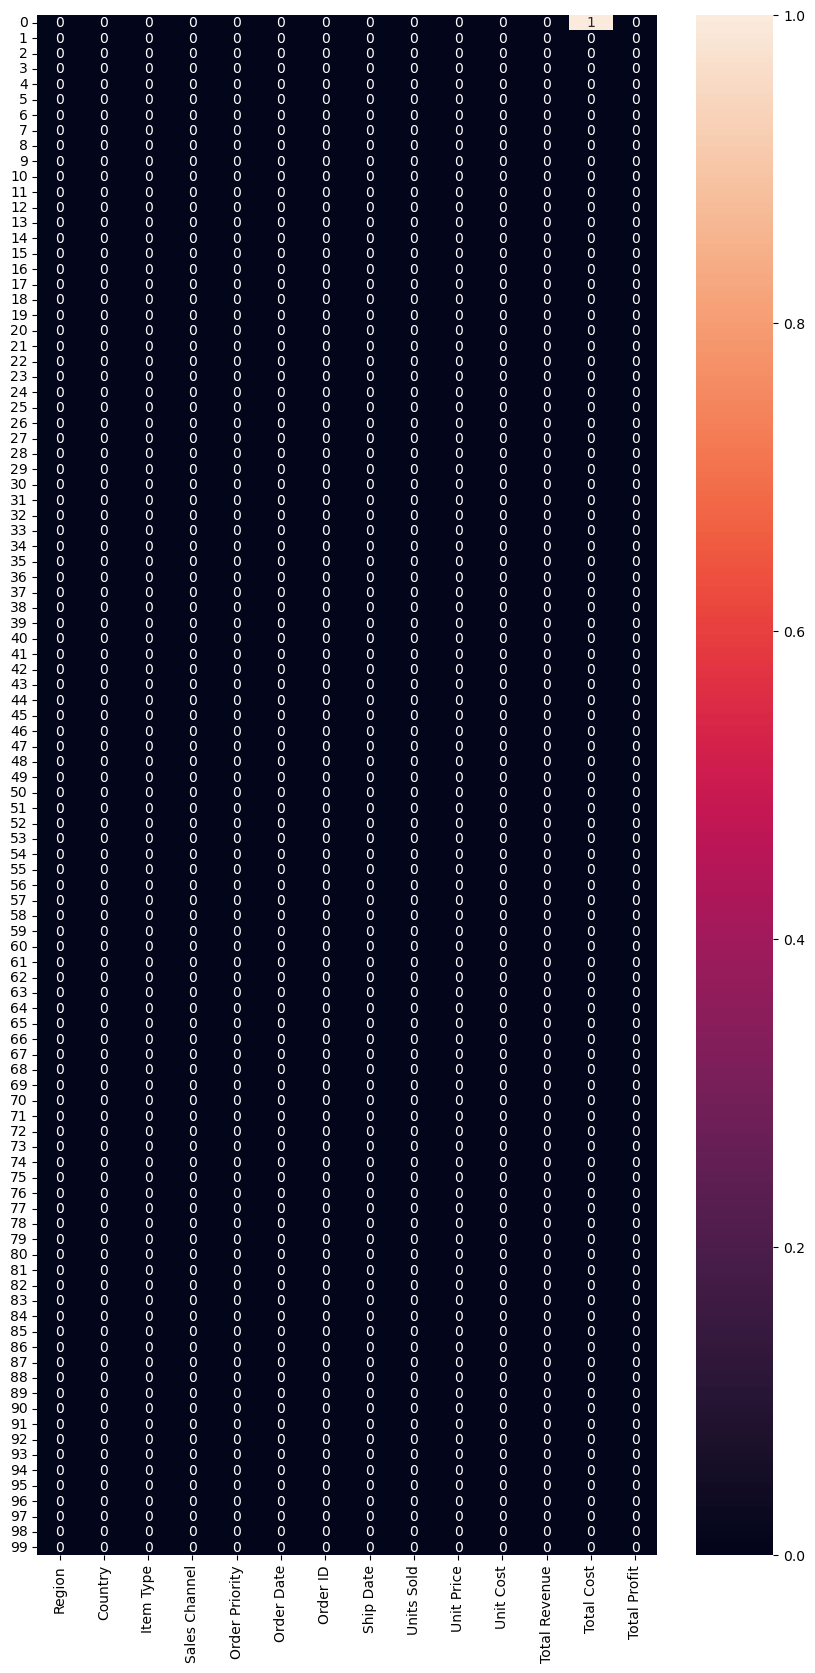

In [36]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot= True) #NULL VALUE FOUND IN 'TOTAL COST' COLUMN

In [38]:
# Fill missing values in numeric columns with their mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


date_columns = ['Order Date', 'Ship Date']
for column in date_columns:
    data[column] = pd.to_datetime(data[column], errors='coerce')
    data[column] = data[column].fillna(data[column].median())

# Verify if all missing values are handled
print(data.isnull().sum())


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [39]:
data = data.fillna(data.mean())   #FILL MEAN WHERE NULL VALUE PRESENT

TypeError: Could not convert ['Australia and OceaniaCentral America and the CaribbeanEuropeSub-Saharan AfricaSub-Saharan AfricaAustralia and OceaniaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaAsiaSub-Saharan AfricaAsiaCentral America and the CaribbeanAsiaEuropeAsiaSub-Saharan AfricaAsiaAustralia and OceaniaEuropeEuropeCentral America and the CaribbeanAustralia and OceaniaEuropeEuropeAustralia and OceaniaSub-Saharan AfricaEuropeSub-Saharan AfricaEuropeSub-Saharan AfricaAustralia and OceaniaAsiaSub-Saharan AfricaCentral America and the CaribbeanMiddle East and North AfricaSub-Saharan AfricaAsiaEuropeSub-Saharan AfricaMiddle East and North AfricaSub-Saharan AfricaEuropeAsiaSub-Saharan AfricaEuropeEuropeEuropeSub-Saharan AfricaEuropeSub-Saharan AfricaMiddle East and North AfricaSub-Saharan AfricaSub-Saharan AfricaSub-Saharan AfricaAustralia and OceaniaEuropeEuropeSub-Saharan AfricaAustralia and OceaniaEuropeSub-Saharan AfricaMiddle East and North AfricaCentral America and the CaribbeanSub-Saharan AfricaSub-Saharan AfricaCentral America and the CaribbeanEuropeSub-Saharan AfricaAsiaMiddle East and North AfricaSub-Saharan AfricaSub-Saharan AfricaMiddle East and North AfricaNorth AmericaAustralia and OceaniaAsiaEuropeAustralia and OceaniaEuropeMiddle East and North AfricaMiddle East and North AfricaSub-Saharan AfricaSub-Saharan AfricaNorth AmericaSub-Saharan AfricaSub-Saharan AfricaMiddle East and North AfricaEuropeSub-Saharan AfricaAustralia and OceaniaMiddle East and North AfricaEuropeCentral America and the CaribbeanSub-Saharan AfricaAsiaSub-Saharan AfricaNorth AmericaSub-Saharan Africa'] to numeric

In [40]:
data['Total Cost']= data['Total Cost'].astype('Float64')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28 00:00:00,669165933,2010-06-27 00:00:00,9925,255.28,159.42,2533654.00,925235.620303,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22 00:00:00,963881480,2012-09-15 00:00:00,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2013-08-03 12:00:00,341417157,2013-11-04 12:00:00,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20 00:00:00,514321792,2013-11-04 12:00:00,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-08-03 12:00:00,115456712,2013-11-04 12:00:00,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26 00:00:00,512878119,2013-11-04 12:00:00,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2013-08-03 12:00:00,810711038,2011-12-28 00:00:00,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2013-08-03 12:00:00,728815257,2016-06-29 00:00:00,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30 00:00:00,559427106,2013-11-04 12:00:00,5767,81.73,56.67,471336.91,326815.89,144521.02


<Axes: >

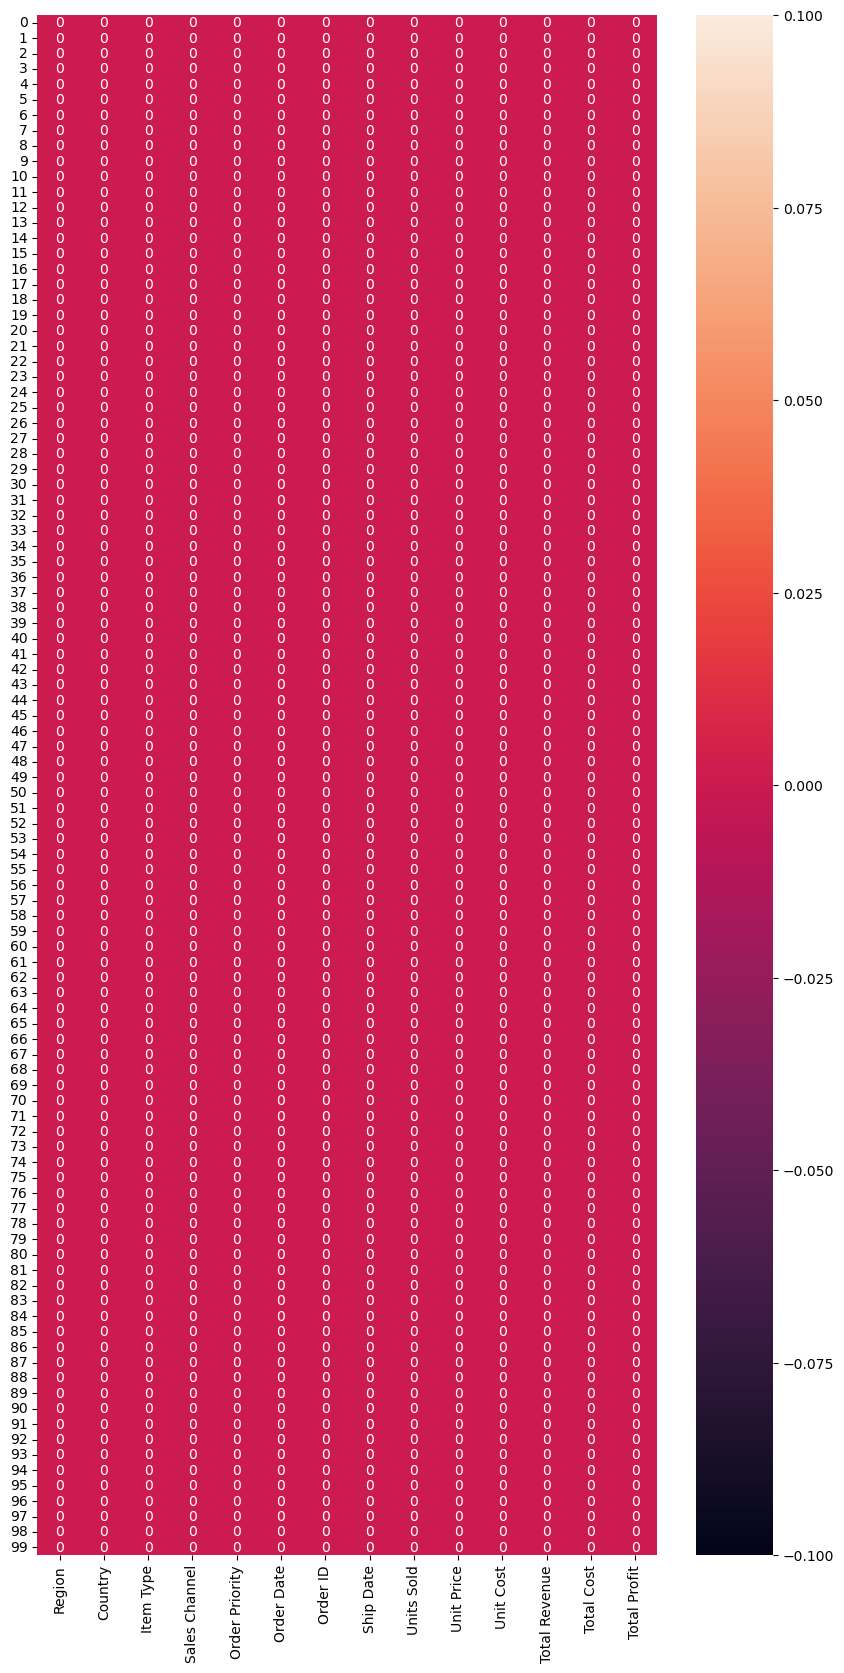

In [41]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot= True)   # NO NULL VALUES

In [42]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28 00:00:00,669165933,2010-06-27 00:00:00,9925,255.28,159.42,2533654.00,925235.620303,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22 00:00:00,963881480,2012-09-15 00:00:00,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2013-08-03 12:00:00,341417157,2013-11-04 12:00:00,1779,651.21,524.96,1158502.59,933903.84,224598.75


Data Analysis:

Queries:

Which regions have the highest total sales revenue?

What is the average unit price and unit cost for each item type?

Which country has the highest total profit?

How does the sales channel affect the order priority distribution?

What is the average order processing time (duration between order and ship dates) for each sales channel?

Which item types have the highest and lowest total sales?

How does the order priority vary across different regions?

What is the correlation between unit price and total profit?

Are there any seasonal trends or patterns in the sales data?

How does the number of units sold vary across different countries?

1- Which regions have the highest total sales revenue?

In [43]:
Highest_Total_Revenue= data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()


'Sub-Saharan Africa'

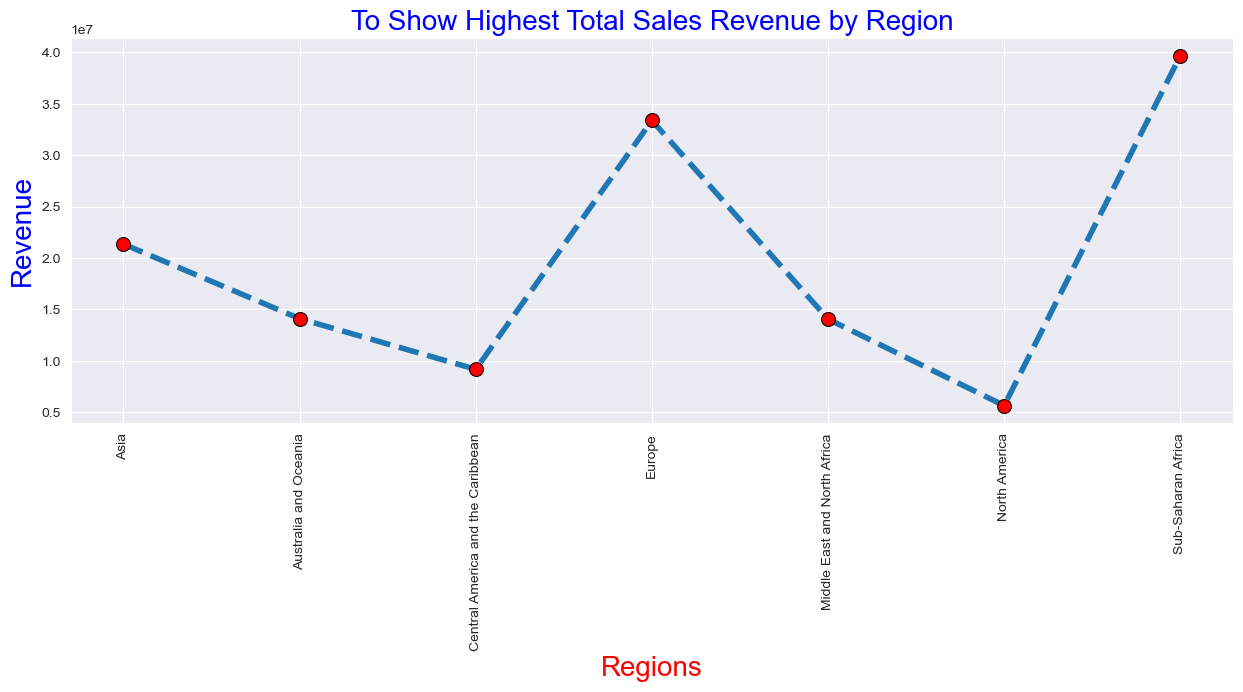

In [44]:

group_data= data.groupby(data['Region'])['Total Revenue'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(data= group_data, linestyle= '--' ,linewidth= 4 , marker= 'o', markersize= 10, 
             markerfacecolor='red', markeredgecolor='black')

plt.xticks(rotation= 90)
plt.title('To Show Highest Total Sales Revenue by Region', fontsize= 20, color= 'Blue')
plt.xlabel('Regions', fontsize= 20, color= 'red')
plt.ylabel('Revenue', fontsize= 20, color= 'b')
plt.show()


# 1e7 is scientific form. it means 1*10**7= 10,000,000

2- What is the average unit price and unit cost for each item type?

In [45]:
Avg_Unit_Price= data.groupby(data['Item Type'])['Unit Price'].mean()
Avg_Unit_Cost= data.groupby(data['Item Type'])['Unit Cost'].mean()

Avg_Price_Cost= pd.DataFrame({'Average Unit Price': Avg_Unit_Price,
                              'Average Unit Cost': Avg_Unit_Cost})

Avg_Price_Cost

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


3- Which country has the highest total profit?

In [46]:
Total_Profit_By_Comapany= data.groupby(data['Country']) ['Total Profit'].sum()
Highest_Total_Profit_County= Total_Profit_By_Comapany.idxmax()

print("Country with the highest total profit:",Highest_Total_Profit_County)

Country with the highest total profit: Djibouti


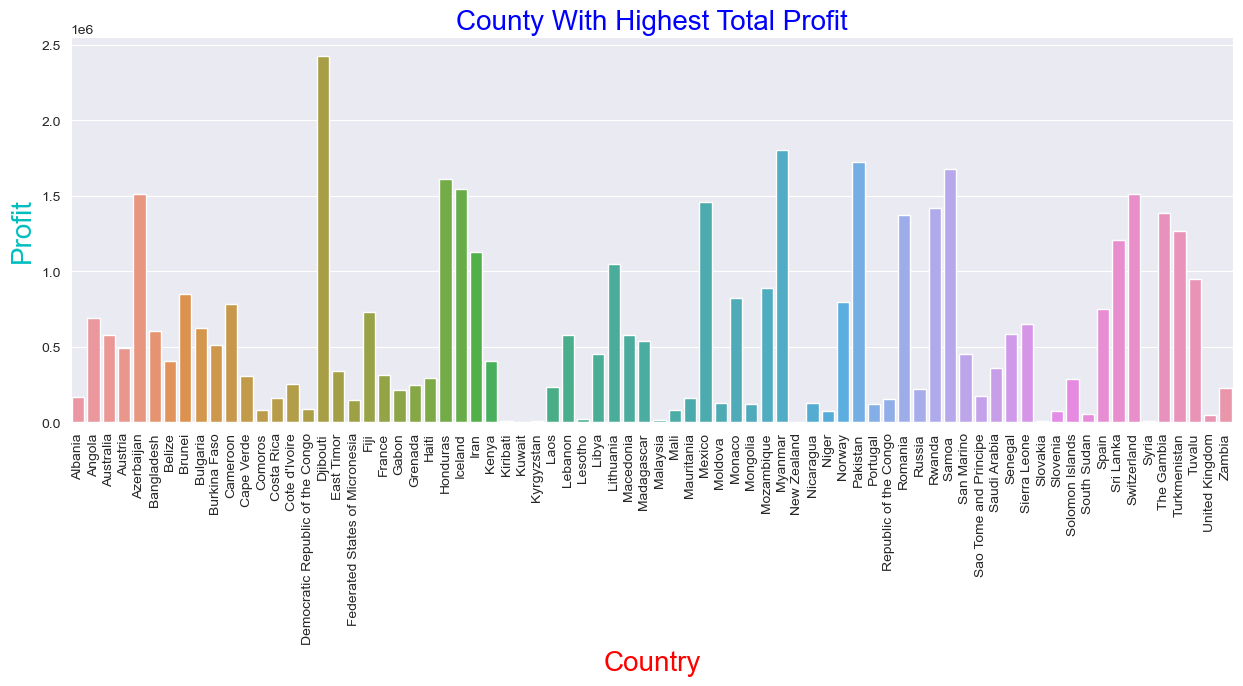

In [47]:
group_data= data.groupby(data['Country']) ['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(x= group_data.index, y= group_data )

plt.xticks(rotation= 90)
plt.title('County With Highest Total Profit', fontsize= 20, color= 'Blue')
plt.xlabel('Country', fontsize= 20, color= 'red')
plt.ylabel('Profit', fontsize= 20, color= 'c')
plt.show()

4- How does the sales channel affect the order priority distribution?

In [48]:
Sales_Channel_Order_Priority_Distribution= data.groupby(data['Sales Channel']) ['Order Priority'].value_counts()
Sales_Channel_Order_Priority_Distribution

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

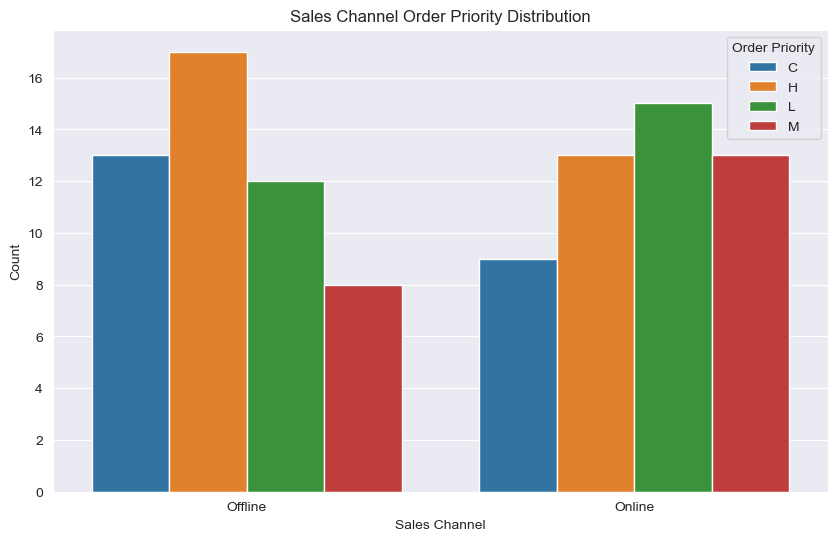

In [49]:


Sales_Channel_Order_Priority_Distribution = data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count()

# Reset the index to convert the grouped data into a DataFrame
Sales_Channel_Order_Priority_Distribution = Sales_Channel_Order_Priority_Distribution.reset_index(name='Count')

# Set the style
sns.set_style('darkgrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Count', hue='Order Priority', data=Sales_Channel_Order_Priority_Distribution)

# Add labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Sales Channel Order Priority Distribution')

# Display the plot
plt.show()


5- What is the average order processing time (duration between order and ship dates) for each sales channel?

In [50]:
data['Processing Time']= data['Ship Date']-data['Order Date']

Avg_Processing_Time= data.groupby(data['Sales Channel'])['Processing Time'].mean()
Avg_Processing_Time

Sales Channel
Offline    113 days 16:19:12
Online    -24 days +20:38:24
Name: Processing Time, dtype: timedelta64[ns]

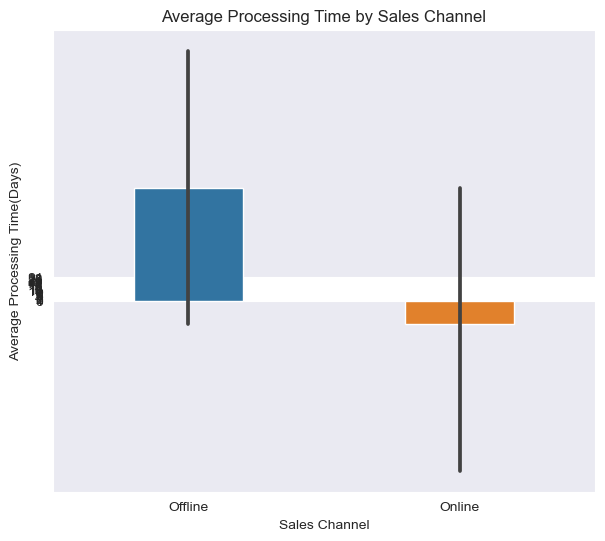

In [51]:
plt.figure(figsize=(7, 6))

sns.barplot(data= data, x= data['Sales Channel'], y=data['Processing Time'].dt.days, width= 0.4 )

plt.title('Average Processing Time by Sales Channel')
plt.xlabel('Sales Channel')
plt.yticks(np.arange(0,25,1))
plt.ylabel('Average Processing Time(Days)')

plt.show()



6- Which item types have the highest and lowest total sales?

In [52]:
group_item_type= data.groupby(data['Item Type'])['Total Revenue'].sum()

highest_sales_revenue_item_type= group_item_type.idxmax()
lowest_sales_revenue_item_type= group_item_type.idxmin()

print("{'Highest Sales Revenue By Item Type':", highest_sales_revenue_item_type, "\n'Lowest Sales Revenue By Item Type':", lowest_sales_revenue_item_type, "}")

{'Highest Sales Revenue By Item Type': Cosmetics 
'Lowest Sales Revenue By Item Type': Fruits }


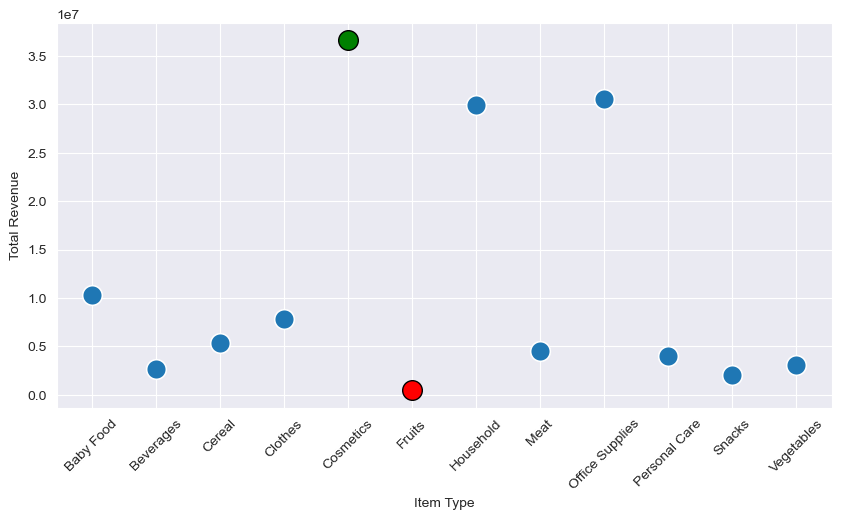

In [53]:
plt.figure(figsize=(10,5))

# Highlight Max Value
sns.scatterplot(x=group_item_type.index, y=group_item_type, s=200)
max_index = group_item_type.idxmax()
plt.scatter(x=max_index, y=group_item_type[max_index], s=200, color='Green', edgecolor='black')

# Highlight the minimum value
min_index = group_item_type.idxmin()
plt.scatter(x=min_index, y=group_item_type[min_index], s=200, color='RED', edgecolor='black')

plt.yticks(rotation= 0)
plt.xticks(rotation= 45)
plt.show()

7- How does the order priority vary across different regions?

In [54]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts()
Diff_regions_by_order_priority

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   M                  2
                                   C                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  L                  2
                                   H                  2
                                   C                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       M                  

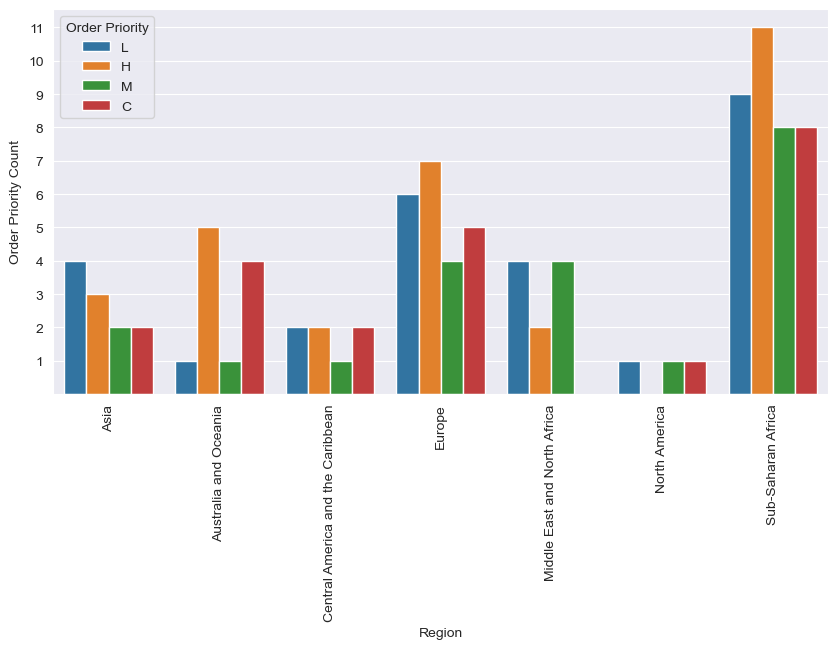

In [55]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts().reset_index(name='Order Priority Count')
plt.figure(figsize= (10,5))
sns.barplot(data= Diff_regions_by_order_priority, x= 'Region', y= 'Order Priority Count', hue= 'Order Priority')
plt.xticks(rotation= 90)
plt.yticks(np.arange(1,12,1))

plt.show()

8- What is the correlation between unit price and total profit?

In [56]:
Correlation_Unit_Price_Total_Profit= data['Unit Price'].corr(data['Total Profit'])

print("Correlation between Unit Price and Total Profit:", Correlation_Unit_Price_Total_Profit)


Correlation between Unit Price and Total Profit: 0.5573652488121268


<function matplotlib.pyplot.show(close=None, block=None)>

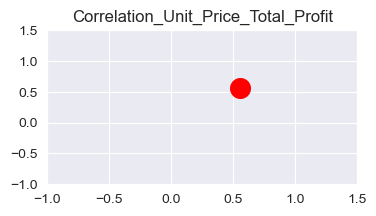

In [57]:
plt.figure(figsize=(4,2))
plt.scatter(x= Correlation_Unit_Price_Total_Profit, y= Correlation_Unit_Price_Total_Profit, s= 200, color= 'RED' )
plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))
plt.title('Correlation_Unit_Price_Total_Profit')

plt.show

9- Are there any seasonal trends or patterns in the sales data?

In [58]:
month_names= {1: 'JAN',
              2: 'FEB',
              3: 'MAR',
              4: 'APR',
              5: 'MAY',
              6: 'JUN',
              7: 'JUL',
              8: 'AUG',
              9: 'SEPT',
             10: 'OCT',
             11: 'NOV',
             12: 'DEC'}
monthly_sales = data.groupby(data['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index= monthly_sales.index.map(month_names)

monthly_sales


Order Date
JAN      8846293.82
FEB      5884465.12
MAR      2028407.92
APR      8406818.15
MAY     11064739.47
JUN      4045279.41
JUL     10191773.17
AUG     49381405.12
SEPT     5294357.85
OCT     13303887.95
NOV     12269225.29
DEC      6632115.04
Name: Total Revenue, dtype: float64

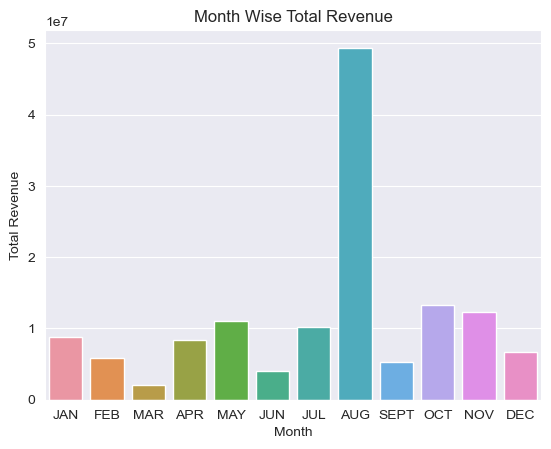

In [59]:

sns.barplot(x= monthly_sales.index, y= monthly_sales)
plt.title('Month Wise Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


10- How does the number of units sold vary across different countries?

In [60]:
Diff_countries_by_unit_sold= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold')
pd.set_option('display.max_rows',None)
Diff_countries_by_unit_sold

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


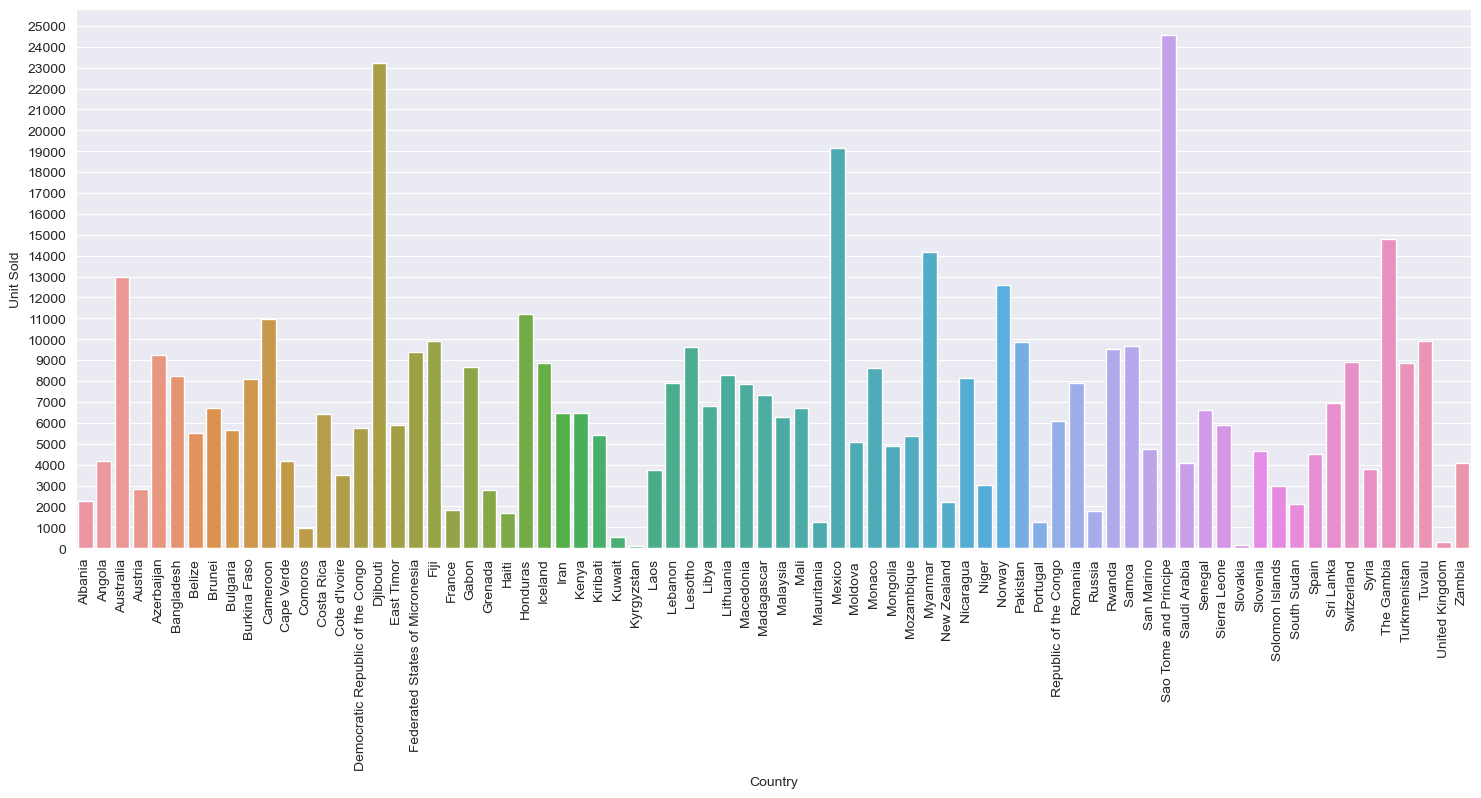

In [61]:
plt.figure(figsize= (18,7))
sns.barplot( data= Diff_countries_by_unit_sold, x= 'Country', y= 'Unit Sold')
plt.xticks(rotation= 90)
plt.yticks(np.arange(0,26000,1000))
plt.show()

Other Queries:

How does the total sales revenue vary across different countries? 

What is the distribution of unit prices for each item type? 

Which sales channel has the highest average unit price?

Are there any outliers in the total cost distribution?

How does the total profit vary across different item types?

What is the average order processing time for each country?

Which region has the highest average total revenue per order?

Is there a relationship between the number of units sold and the total profit?

How does the order priority vary based on the item type?

Are there any trends or patterns in the order dates?

11- How does the total sales revenue vary across different countries? 

In [62]:
sales_revenue_by_countries=  data.groupby(data['Country']) ['Total Revenue'].sum().reset_index(name= 'Total Revenue')
sales_revenue_by_countries

,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
5,Bangladesh,902980.64
6,Belize,600821.44
7,Brunei,4368316.68
8,Bulgaria,2779199.71
9,Burkina Faso,1245112.92


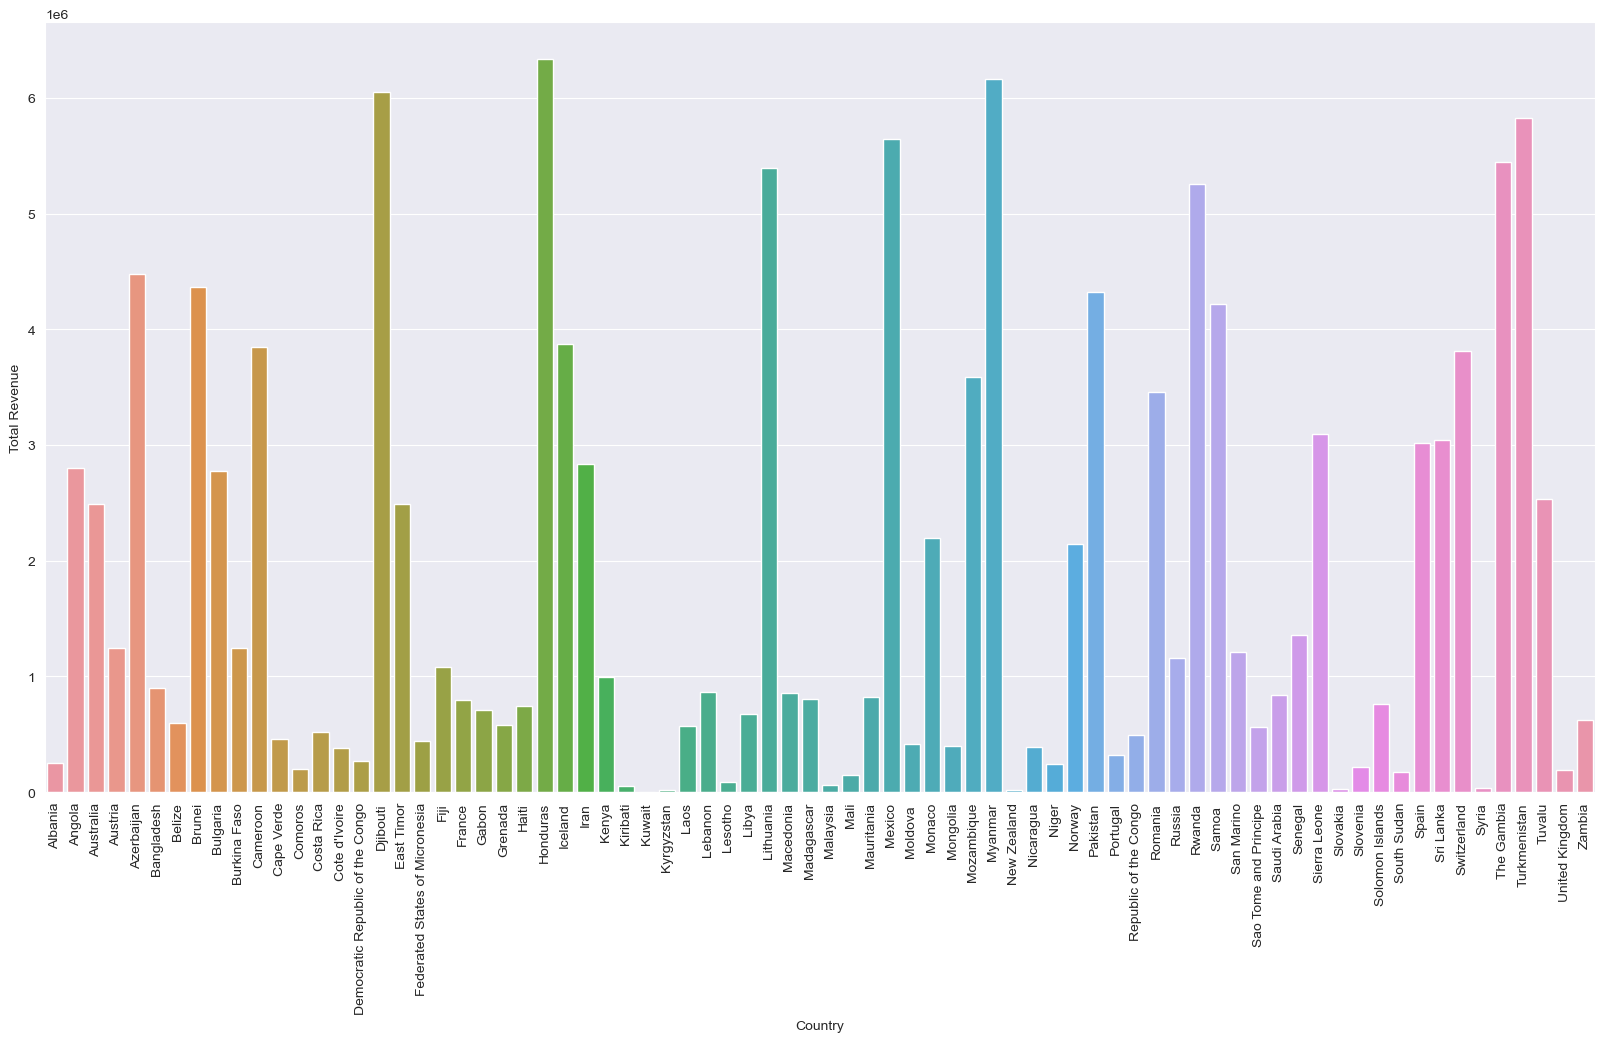

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(x= sales_revenue_by_countries['Country'], y= sales_revenue_by_countries['Total Revenue'])
plt.xticks(rotation= 90)
plt.show()

12- What is the distribution of unit prices for each item type?

In [64]:
unit_price_and_item_type_distribution= data.groupby(data['Item Type'])['Unit Price'].sum().reset_index(name= 'Unit Price')
unit_price_and_item_type_distribution

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


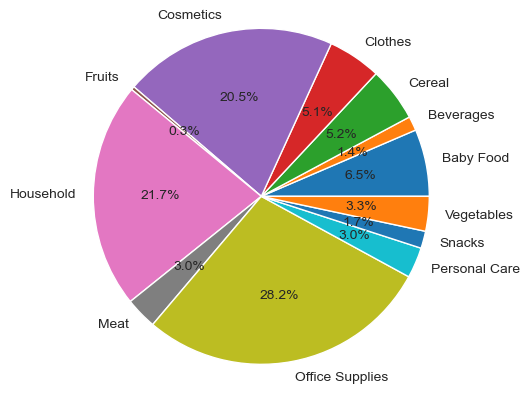

In [65]:
plt.pie(x= unit_price_and_item_type_distribution['Unit Price'], labels= unit_price_and_item_type_distribution['Item Type'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

13- Which sales channel has the highest average unit price?

In [66]:
Highest_avg_unit_price_for_sales_channel= data.groupby(data['Sales Channel']) ['Unit Price'].mean().reset_index(name= 'new')
Highest_avg_unit_price_for_sales_channel



,Sales Channel,new
0,Offline,310.7206
1,Online,242.8020


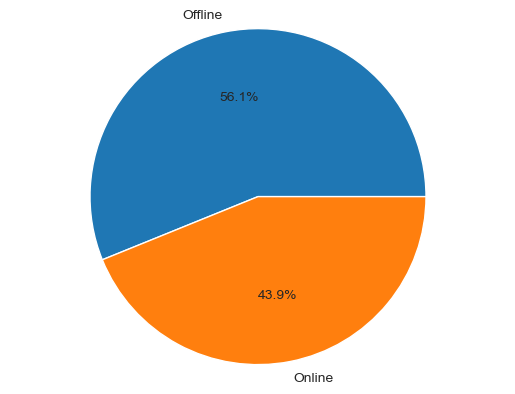

In [67]:
plt.pie(x= Highest_avg_unit_price_for_sales_channel['new'],labels=Highest_avg_unit_price_for_sales_channel['Sales Channel'], autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

14- Are there any outliers in the total cost distribution?

In [68]:


q1= data['Total Cost'].quantile(0.25)
q3= data['Total Cost'].quantile(0.75)

iqr= q3-q1

lower_fence= q1-1.5*iqr
upper_fence= q3+1.5*iqr

outliers= data[(data['Total Cost']<lower_fence)| (data['Total Cost']>upper_fence)].reset_index(drop= True)
outliers



,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Central America and the Caribbean,Honduras,Household,Offline,H,2013-08-03 12:00:00,522840487,2017-02-13 00:00:00,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,1289 days 12:00:00
1,Asia,Myanmar,Household,Offline,H,2015-01-16 00:00:00,177713572,2013-11-04 12:00:00,8250,668.27,502.54,5513227.50,4145955.0,1367272.50,-438 days +12:00:00
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24 00:00:00,166460740,2010-11-17 00:00:00,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days 00:00:00


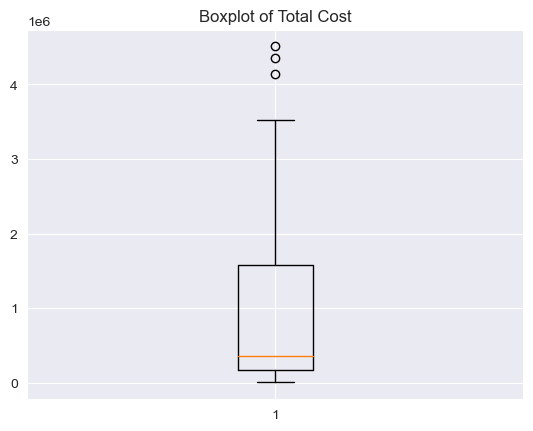

In [69]:

plt.boxplot(data['Total Cost'])
plt.title('Boxplot of Total Cost')
plt.show()


15- How does the total profit vary across different item types?

In [70]:
total_profit_and_diff_item_types= data.groupby(data['Item Type'])['Total Profit'].sum().reset_index(name='Total Profit')
total_profit_and_diff_item_types

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


16- What is the average order processing time for each country?

In [71]:
Avg_Processing_Time_by_country= data.groupby(data['Country'])['Processing Time'].mean()
Avg_Processing_Time_by_country

Country
Albania                            -1235 days +12:00:00
Angola                                  4 days 00:00:00
Australia                              71 days 16:00:00
Austria                             -476 days +12:00:00
Azerbaijan                          -608 days +18:00:00
Bangladesh                         -1166 days +12:00:00
Belize                              -994 days +12:00:00
Brunei                                 93 days 00:00:00
Bulgaria                              286 days 06:00:00
Burkina Faso                           10 days 00:00:00
Cameroon                              -3 days +12:00:00
Cape Verde                            380 days 12:00:00
Comoros                                31 days 00:00:00
Costa Rica                           1386 days 12:00:00
Cote d'Ivoire                       -403 days +12:00:00
Democratic Republic of the Congo       50 days 00:00:00
Djibouti                               95 days 12:00:00
East Timor                            46

17- Which region has the highest average total revenue per order?

In [72]:
data['avg total revenue']= data['Total Revenue']/data['Units Sold']
highest_avg_total_revenue_per_order= data.groupby(data['Region']) ['avg total revenue'].mean()
highest_avg_total_revenue_per_order.sort_values(ascending=True)
highest_avg_total_revenue_per_order.head(1)



Region
Asia    335.809091
Name: avg total revenue, dtype: float64

19- Is there a relationship between the number of units sold and the total profit?

In [73]:
Correlation_unit_sold_and_total_profit= data['Units Sold'].corr(data['Total Profit'])
print(f"Correlation coefficient: {Correlation_unit_sold_and_total_profit}")


Correlation coefficient: 0.5645504620845976


20- How does the order priority vary based on the item type?

In [74]:
Order_priority_vary_on_item_type= data.groupby(data['Order Priority'])['Item Type'].value_counts().reset_index(name= 'No. Of Items')
Order_priority_vary_on_item_type

,Order Priority,Item Type,No. Of Items
0,C,Beverages,7
1,C,Clothes,4
2,C,Vegetables,2
3,C,Personal Care,2
4,C,Office Supplies,2
5,C,Baby Food,1
6,C,Household,1
7,C,Fruits,1
8,C,Cosmetics,1
9,C,Cereal,1
